**Team Project - Group 14**




In this project we are experimenting on a very useful Self Driving technique called **Behavioural Cloning** -- In which we are dealing with Deep Neural Networks, Feature Extraction with Convolutional Neural Networks and continuous regression.

For the course of this project, we are using **Udacity's** open-source Self Driving Simulator using which we can easily generate the training dataset using the training mode and validate our model using the autonomous mode. When we drive the car in training mode, it captures images at right/left/center angles and saves them in an IMG directory with their respective steering angle, throttle, break and speed in driving_log.csv

https://github.com/udacity/self-driving-car-sim

After just 3 laps of driving the car, we generated a sufficient amount of data, lets's just go ahead and download the dataset from our github

In [ ]:
! git clone https://github.com/mukundsharma15/Behavioural-Cloning.git

Cloning into 'Behavioural-Cloning'...
remote: Enumerating objects: 13671, done.
remote: Counting objects: 100% (13671/13671), done.
remote: Compressing objects: 100% (13668/13668), done.
remote: Total 13671 (delta 1), reused 13668 (delta 1), pack-reused 0
Receiving objects: 100% (13671/13671), 201.29 MiB | 13.67 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (13661/13661), done.


In [ ]:
!ls Behavioural-Cloning/Data

driving_log.csv  IMG


This CSV file contains all the training data and the appropriate lables and the IMG folder contains the images taken during the training model from all the three cameras.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import random
import os
import ntpath

In [ ]:
dir = 'Behavioural-Cloning/Data'
dataset = pd.read_csv(os.path.join(dir, 'driving_log.csv'), names = ['center', 'left', 'right', 'steering', 'throttle', 'break', 'speed'])
pd.set_option('display.max_colwidth', -1)
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


,center,left,right,steering,throttle,break,speed
0,D:\Term-2\ML\project\dataset\IMG\center_2022_03_11_13_09_56_852.jpg,D:\Term-2\ML\project\dataset\IMG\left_2022_03_11_13_09_56_852.jpg,D:\Term-2\ML\project\dataset\IMG\right_2022_03_11_13_09_56_852.jpg,0.0,0.0,0.0,0.000084
1,D:\Term-2\ML\project\dataset\IMG\center_2022_03_11_13_09_56_957.jpg,D:\Term-2\ML\project\dataset\IMG\left_2022_03_11_13_09_56_957.jpg,D:\Term-2\ML\project\dataset\IMG\right_2022_03_11_13_09_56_957.jpg,0.0,0.0,0.0,0.000078
2,D:\Term-2\ML\project\dataset\IMG\center_2022_03_11_13_09_57_059.jpg,D:\Term-2\ML\project\dataset\IMG\left_2022_03_11_13_09_57_059.jpg,D:\Term-2\ML\project\dataset\IMG\right_2022_03_11_13_09_57_059.jpg,0.0,0.0,0.0,0.000078
3,D:\Term-2\ML\project\dataset\IMG\center_2022_03_11_13_09_57_161.jpg,D:\Term-2\ML\project\dataset\IMG\left_2022_03_11_13_09_57_161.jpg,D:\Term-2\ML\project\dataset\IMG\right_2022_03_11_13_09_57_161.jpg,0.0,0.0,0.0,0.000079
4,D:\Term-2\ML\project\dataset\IMG\center_2022_03_11_13_09_57_264.jpg,D:\Term-2\ML\project\dataset\IMG\left_2022_03_11_13_09_57_264.jpg,D:\Term-2\ML\project\dataset\IMG\right_2022_03_11_13_09_57_264.jpg,0.0,0.0,0.0,0.000081


let's fix the unwanted path in our image dataset

In [ ]:
def fix_path(path):
  _ , img_name = ntpath.split(path)
  return img_name

dataset['center'] = dataset['center'].apply(fix_path)
dataset['left'] = dataset['left'].apply(fix_path)
dataset['right'] = dataset['right'].apply(fix_path)
dataset.head()

,center,left,right,steering,throttle,break,speed
0,center_2022_03_11_13_09_56_852.jpg,left_2022_03_11_13_09_56_852.jpg,right_2022_03_11_13_09_56_852.jpg,0.0,0.0,0.0,0.000084
1,center_2022_03_11_13_09_56_957.jpg,left_2022_03_11_13_09_56_957.jpg,right_2022_03_11_13_09_56_957.jpg,0.0,0.0,0.0,0.000078
2,center_2022_03_11_13_09_57_059.jpg,left_2022_03_11_13_09_57_059.jpg,right_2022_03_11_13_09_57_059.jpg,0.0,0.0,0.0,0.000078
3,center_2022_03_11_13_09_57_161.jpg,left_2022_03_11_13_09_57_161.jpg,right_2022_03_11_13_09_57_161.jpg,0.0,0.0,0.0,0.000079
4,center_2022_03_11_13_09_57_264.jpg,left_2022_03_11_13_09_57_264.jpg,right_2022_03_11_13_09_57_264.jpg,0.0,0.0,0.0,0.000081


We are solving a regression problem here in which trying to predict steering angle, let's visualize our dataset.

<BarContainer object of 25 artists>

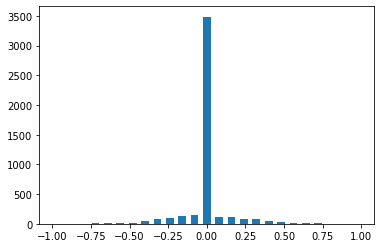

In [ ]:
hist, bins = np.histogram(dataset['steering'], 25)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)

In the above histogram, steering angles are from -1 to +1, centered aroung a steering angle of 0 and the vertical axis represents the frequency of steering angle.

We can clearly observe, the data we obtained from driving the car in track 1 has more 0 angles as the nature of the track, because most of the time we drove the car in the middle of the track to keep the car between the lines. However, the left and right steering angles are pretty balanced out which is pretty good for for training. This balanced data will save our model from being biased.

But there is a huge problem with our dataset, the maximum number of angles is 0, if we train our model using this dataset, this will make our model biased towards predicting 0 steering angle thus the car ends up driving straight all the time.

To fix this problem, we are going to limit our dataset by rejecting all the samples above a certain threshold. This helps us in making our dataset uniform and not biased towards a certain.

Image Preprocessing

In [ ]:
# augmenting the image, in which we are removing the scener and the front of the car because they are not relevent
# as the NVIDIA model want's the image in YUV formatting and it worked pretty well in that situation, we are going to use the same.
# YUV is also a 3 channel image, Y represents the brightness and UV ads color to the image 
def pre_processing(img):
  img = mpimg.imread(img)
  #crop the unwanted image
  img = img[60:135, :, :]
  # apply YUV filter
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  # apply gaussian blurr 
  img = cv2.GaussianBlur(img, (3, 3), 0)
  return img

Text(0.5, 1.0, 'Processed Image')

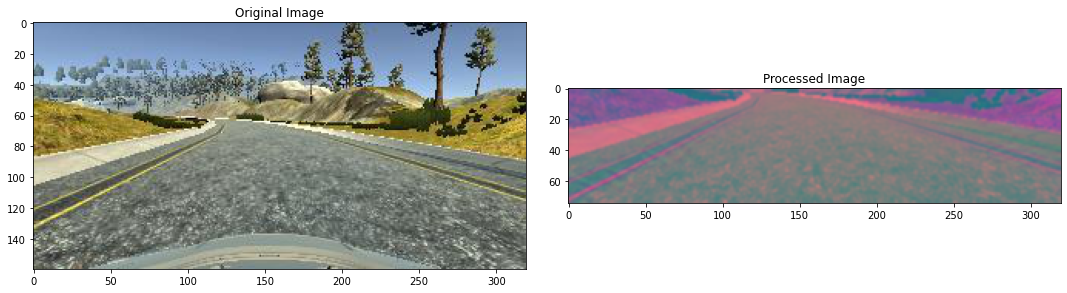

In [ ]:
import matplotlib.image as mpimg

image = dataset['center'][100]
name = dir + '/IMG/' + image
raw_image = mpimg.imread(name)
augmented_image = pre_processing(name)

figure, ax = plt.subplots(1, 2, figsize=(15, 10))
figure.tight_layout()
ax[0].imshow(raw_image)
ax[0].set_title('Original Image')
ax[1].imshow(augmented_image)
ax[1].set_title('Processed Image')

Using the above augmentation let's just train an intial model on the Nvidia CNN archiecture.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils import data
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import csv

In [ ]:
import torch.utils.data as data

# in this augment func we are removing the unwanted scener from the image, because this is not important to our model
def img_augment(img, angle):
  name = dir + '/IMG/' + img.split('\\')[-1]
  image = cv2.imread(name)
  image = image[65:-25, :, :]
  if np.random.rand() < 0.5:
    image = cv2.flip(image, 1)
    angle = angle * -1.0  
  return image, angle

In [ ]:
#train and test split

In [ ]:
samples = []
with open(dir + '/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None)
    for line in reader:
        samples.append(line)
        
train_len = int(0.8*len(samples))
valid_len = len(samples) - train_len
train_dataset, validation_dataset = data.random_split(samples, lengths=[train_len, valid_len])

In [ ]:

class Dataset(data.Dataset):

    def __init__(self, samples, transform=None):

        self.samples = samples
        self.transform = transform

    def __getitem__(self, index):
        batch_samples = self.samples[index]
        steering_angle = float(batch_samples[3])
        
        center_img, steering_angle_center = img_augment(batch_samples[0], steering_angle)
        left_img, steering_angle_left = img_augment(batch_samples[1], steering_angle + 0.4)
        right_img, steering_angle_right = img_augment(batch_samples[2], steering_angle - 0.4)

        center_img = self.transform(center_img)
        left_img = self.transform(left_img)
        right_img = self.transform(right_img)

        return (center_img, steering_angle_center), (left_img, steering_angle_left), (right_img, steering_angle_right)
      
    def __len__(self):
        return len(self.samples)
      

In [ ]:
params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 2}

transformations = transforms.Compose([transforms.Lambda(lambda x: (x / 255.0) - 0.5)])

training_set = Dataset(train_dataset, transformations)
training_generator = data.DataLoader(training_set, **params)

validation_set = Dataset(validation_dataset, transformations)
validation_generator = data.DataLoader(validation_set, **params)


In [ ]:
import torch.nn.init as init
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
# Replicating the Nvidia Model  https://arxiv.org/pdf/1604.07316v1.pdf
class Nvidia(nn.Module):

    def __init__(self):
        super(Nvidia, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 24, 5, stride=2),
            nn.ELU(),
            nn.Conv2d(24, 36, 5, stride=2),
            nn.ELU(),
            nn.Conv2d(36, 48, 5, stride=2),
            nn.ELU(),
            nn.Conv2d(48, 64, 3),
            nn.ELU(),
            nn.Conv2d(64, 64, 3),
            nn.Dropout(0.25)
        )
        self.linear_layers = nn.Sequential(
            nn.Linear(in_features=64 * 2 * 33, out_features=100),
            nn.ELU(),
            nn.Linear(in_features=100, out_features=50),
            nn.ELU(),
            nn.Linear(in_features=50, out_features=10),
            nn.Linear(in_features=10, out_features=1)
        )
        
    def forward(self, input):  
        input = input.view(input.size(0), 3, 70, 320)
        output = self.conv_layers(input)
        print(output.shape)
        output = output.view(output.size(0), -1)
        output = self.linear_layers(output)
        return output

In [ ]:
model = Nvidia()
optimizer = optim.Adam(model.parameters(), lr=0.01)

criterion = nn.MSELoss()

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
print('device is: ', device)

device is:  cuda


In [36]:
!nvidia-smi

Sun Mar 27 22:41:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    73W / 149W |    940MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
def toDevice(datas, device):
  
  imgs, angles = datas
  return imgs.float().to(device), angles.float().to(device)

In [26]:
max_epochs = 30

for epoch in range(max_epochs):
    
    model.to(device)
    
    # Training
    train_loss = 0
    model.train()
    for local_batch, (centers, lefts, rights) in enumerate(training_generator):
        # Transfer to GPU
        centers, lefts, rights = toDevice(centers, device), toDevice(lefts, device), toDevice(rights, device)
        
        # Model computations
        optimizer.zero_grad()
        datas = [centers, lefts, rights]        
        for data in datas:
            imgs, angles = data
            outputs = model(imgs)
            loss = criterion(outputs, angles.unsqueeze(1))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            
        if local_batch % 100 == 0:
            print('Loss: %.3f '
                % (train_loss/((local_batch+1)*3)))


Streaming output truncated to the last 5000 lines.
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([57, 64, 2, 33])
torch.Size([57, 64, 2, 33])
torch.Size([57, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
Loss: 0.133 
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([

As our traning loss is pretty decent Loss: 0.122 , we can move forward and test this model

In [27]:
# Validation
model.eval()
valid_loss = 0
with torch.set_grad_enabled(False):
    for local_batch, (centers, lefts, rights) in enumerate(validation_generator):
        # Transfer to GPU
        centers, lefts, rights = toDevice(centers, device), toDevice(lefts, device), toDevice(rights, device)
        
        # Model computations
        optimizer.zero_grad()
        datas = [centers, lefts, rights]        
        for data in datas:
            imgs, angles = data
#           print("Validation image: ", imgs.shape)
            outputs = model(imgs)
            loss = criterion(outputs, angles.unsqueeze(1))
                
            valid_loss += loss.item()

            avg_valid_loss = valid_loss/(local_batch+1)
        if local_batch % 100 == 0:
            print('Valid Loss: %.3f '% (valid_loss/(local_batch+1)))

torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
Valid Loss: 0.434 
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
torch.Size([64, 64, 2, 33])
t

In [28]:
state = {
        'model': model.module if device == 'cuda' else model,
        }

torch.save(state, 'model.h5')

To test the validity of our model, we have to use the Udacity simulator for that we need model.h5 which we just downloaded and a drive.py which will load out model, get the frames from the simulator and process through our model and send back the steering angle back to the simulator.


In [32]:
# Following are the results from our initial test on training track.

**Out model performed horibbly even on the trained data, Refer to initial test video for the test result**


Maybe it happened because of the network capacity we used on training on such a small dataset. The car is moving straight even on sharp turns, let's try one more CNN architecture with less number of layers and compare the performance.




**Smaller CNN archiecture on the same dataset.**

In [33]:
class NvidiaLight(nn.Module):

    def __init__(self):
        super(NvidiaLight, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 24, 3, stride=2),
            nn.ELU(),
            nn.Conv2d(24, 48, 3, stride=2),
            nn.MaxPool2d(4, stride=4),
            nn.Dropout(p=0.25)
        )
        self.linear_layers = nn.Sequential(
            nn.Linear(in_features=48*4*19, out_features=50),
            nn.ELU(),
            nn.Linear(in_features=50, out_features=10),
            nn.Linear(in_features=10, out_features=1)
        )
        

    def forward(self, input):
        input = input.view(input.size(0), 3, 70, 320)
        output = self.conv_layers(input)
        print(output.shape)
        output = output.view(output.size(0), -1)
        output = self.linear_layers(output)
        return output

In [34]:
model2 = NvidiaLight()
optimizer2 = optim.Adam(model2.parameters(), lr=0.0001)

criterion = nn.MSELoss()

In [35]:
max_epochs = 30

for epoch in range(max_epochs):
    
    model2.to(device)
    
    # Training
    train_loss = 0
    model2.train()
    for local_batch, (centers, lefts, rights) in enumerate(training_generator):
        # Transfer to GPU
        centers, lefts, rights = toDevice(centers, device), toDevice(lefts, device), toDevice(rights, device)
        
        # Model computations
        optimizer2.zero_grad()
        datas = [centers, lefts, rights]        
        for data in datas:
            imgs, angles = data
            outputs = model2(imgs)
            loss = criterion(outputs, angles.unsqueeze(1))
            loss.backward()
            optimizer2.step()

            train_loss += loss.item()
            
        if local_batch % 100 == 0:
            print('Loss: %.3f '
                % (train_loss/((local_batch+1)*3)))


Streaming output truncated to the last 5000 lines.
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([57, 48, 4, 19])
torch.Size([57, 48, 4, 19])
torch.Size([57, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
Loss: 0.117 
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([64, 48, 4, 19])
torch.Size([

In [37]:
state = {
        'model2': model2.module if device == 'cuda' else model2,
        }

torch.save(state, 'model2.h5')

In [38]:
# After testing the second model on the trained and test track

**Refer to video 2 for trained track result and video 3 for test track result.** By simply reducing the layers in the architecture, the car is performing pretty well compared to the last model.The behaviour of the car is not stable as we like to further increase the performance we will try to balance the dataset using the approch we discussed above. 

**Test Track Result:** Performed very bad, because our model has not learned to generalize to the new dataset. The main reason is, the dataset we are using is pretty small, the trained model performs well on the training tack however fails on the unseen track. To tackle this problem of **overfitting** we have the following appraoch in mind



*   Introduce more data augmentation techniques to increase the dataset.
*   Further reduce the network layers if required.
*   Add more dropout layers if required. 

